In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from utils import get_eval_stats, analyze_protein_gen_helper, analyze_protein_gen_helper_violin, plot_line_prot_comp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
color_bank = ['#6CA783', '#0C8CE1', '#8C33EB', "#DE9D12", "#C500C5", "#3C99A8"]
protein = '7JJK'

In [24]:
pretrained_file = 'data_full/baseline/pretrained/distribution/original_old_10_0.5_0_results_merge_old_baseline.csv'
drakes_file = 'data_full/baseline/drakes/distribution/original_new_10_0.5_0_results_merge_new_baseline.csv'
df_pre = pd.read_csv(pretrained_file)
df_drakes = pd.read_csv(drakes_file)
pre_stats = get_eval_stats(df_pre, target_protein=protein)
drakes_stats = get_eval_stats(df_drakes, target_protein=protein)

In [25]:
N_vals = [1, 10, 50, 100, 150, 200, 250]
stats = {}
for model in ['old']:
    for align in ['bon', 'beam', 'linear', 'spectral']:
        for N in N_vals: 
            name = f"{model}-{align}"
            fn = f"data_full/comp_scaling/original_{model}_10_0.5_0_results_merge_{model}_{protein}_{align}_protgpt_{N}_1.csv"
            if name not in stats:
                stats[name] = {}
            try:
                df = pd.read_csv(fn)
                stat = get_eval_stats(df, target_protein=protein)
                stats[name][N] = stat
            except FileNotFoundError as e:
                stats[name][N] = None
stats['old-bon'][1] = pre_stats
stats['old-beam'][1] = pre_stats

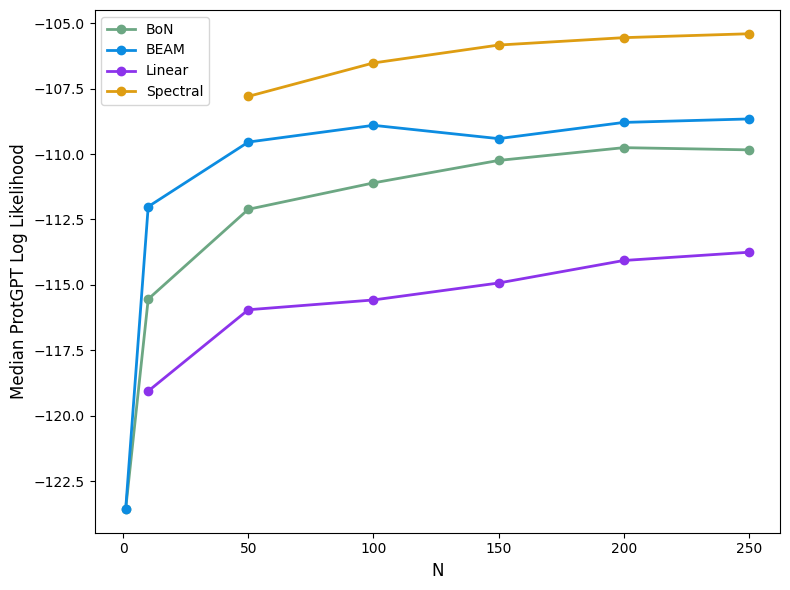

In [30]:
import matplotlib.cm as cm
import numpy as np

plot_name_map = {"old-bon" : "BoN",
                 "old-beam" : "BEAM",
                 "old-spectral" : "Spectral",
                 "old-linear" : "Linear"}

plt.style.use('default')
plt.figure(figsize=(8, 6))

# colors = cm.viridis(np.linspace(0.25, 0.75, len(stats)))
colors = ['#6CA783', '#0C8CE1', '#8C33EB', "#DE9D12", "#C500C5", "#3C99A8"]

for i, test_name in enumerate(stats):
    test_stats = stats[test_name]
    N_plot = []
    ll_vals = []
    for N in N_vals:
        if test_stats[N] is not None:
            ll_vals.append(test_stats[N]['ll'])
            N_plot.append(N)
    if test_name in plot_name_map:
        label = plot_name_map[test_name]
    else:
        label = test_name
    plt.plot(N_plot, ll_vals, label=label, color=colors[i], linewidth=2, marker='o')

plt.xlabel('N', fontsize=12)
plt.ylabel('Median ProtGPT Log Likelihood', fontsize=12)
# plt.title(f'ProtGPT Pretrained Alignment Scaling ({protein})', fontsize=14)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()